In [27]:
#funciones

def ejecutar_sql (nombre_archivo, cur):
    sql_file=open(nombre_archivo)
    sql_as_string=sql_file.read()
    sql_file.close
    cur.executescript(sql_as_string)

In [28]:
import numpy as np
import pandas as pd
import sqlite3 as sql
import plotly.graph_objs as go ### para gráficos
import plotly.express as px
#import a_funciones as fn
import matplotlib.pyplot as plt
import nbformat
from nbconvert import PythonExporter
from nbconvert.preprocessors import ExecutePreprocessor
import os
from mlxtend.preprocessing import TransactionEncoder

In [29]:
## crear copia de db_books datos originales, nombrarla books2 y procesar books2

conn=sql.connect('db_movies') ### crear cuando no existe el nombre de cd  y para conectarse cuando sí existe.
cur=conn.cursor() ###para funciones que ejecutan sql en base de datos


In [30]:
### para verificar las tablas que hay disponibles
cur.execute("SELECT name FROM sqlite_master where type='table' ")
cur.fetchall()

[('usuarios_sel',),
 ('movie_sel',),
 ('movies_vistas',),
 ('movies_sel',),
 ('ratings_final',),
 ('movies_final',),
 ('pelis_final',),
 ('ratings',)]

In [31]:
#### para consultar datos ######## con cur

cur.execute("select * from movies")
cur.fetchall()

OperationalError: no such table: movies

In [32]:
#### para consultar datos ######## con cur

cur.execute("select * from ratings")
cur.fetchall()

[(0, 0, 1, 1, 4.0, 964982703),
 (1, 1, 1, 3, 4.0, 964981247),
 (2, 2, 1, 6, 4.0, 964982224),
 (3, 3, 1, 47, 5.0, 964983815),
 (4, 4, 1, 50, 5.0, 964982931),
 (5, 5, 1, 70, 3.0, 964982400),
 (6, 6, 1, 101, 5.0, 964980868),
 (7, 7, 1, 110, 4.0, 964982176),
 (8, 8, 1, 151, 5.0, 964984041),
 (9, 9, 1, 157, 5.0, 964984100),
 (10, 10, 1, 163, 5.0, 964983650),
 (11, 11, 1, 216, 5.0, 964981208),
 (12, 12, 1, 223, 3.0, 964980985),
 (13, 13, 1, 231, 5.0, 964981179),
 (14, 14, 1, 235, 4.0, 964980908),
 (15, 15, 1, 260, 5.0, 964981680),
 (16, 16, 1, 296, 3.0, 964982967),
 (17, 17, 1, 316, 3.0, 964982310),
 (18, 18, 1, 333, 5.0, 964981179),
 (19, 19, 1, 349, 4.0, 964982563),
 (20, 20, 1, 356, 4.0, 964980962),
 (21, 21, 1, 362, 5.0, 964982588),
 (22, 22, 1, 367, 4.0, 964981710),
 (23, 23, 1, 423, 3.0, 964982363),
 (24, 24, 1, 441, 4.0, 964980868),
 (25, 25, 1, 457, 5.0, 964981909),
 (26, 26, 1, 480, 4.0, 964982346),
 (27, 27, 1, 500, 3.0, 964981208),
 (28, 28, 1, 527, 5.0, 964984002),
 (29, 29, 1, 5

In [33]:
##### consultar trayendo para pandas ###
df_movies=pd.read_sql("select * from movies", conn)
df_ratings=pd.read_sql("select * from ratings", conn)


DatabaseError: Execution failed on sql 'select * from movies': no such table: movies

In [9]:
#### para llevar de pandas a BD
df_movies.to_sql("movies", conn, if_exists='replace')
df_ratings.to_sql("ratings", conn, if_exists='replace')
###conn.close()para cerrar conexión


OperationalError: duplicate column name: level_0

In [34]:
df_movies

,level_0,index,movieId,title,genres
0,0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,1,2,Jumanji (1995),Adventure|Children|Fantasy
2,2,2,3,Grumpier Old Men (1995),Comedy|Romance
3,3,3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,4,4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...
9737,9737,9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,9738,9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,9739,9739,193585,Flint (2017),Drama
9740,9740,9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [11]:
df_ratings

,level_0,index,userId,movieId,rating,timestamp
0,0,0,1,1,4.0,964982703
1,1,1,1,3,4.0,964981247
2,2,2,1,6,4.0,964982224
3,3,3,1,47,5.0,964983815
4,4,4,1,50,5.0,964982931
...,...,...,...,...,...,...
100831,100831,100831,610,166534,4.0,1493848402
100832,100832,100832,610,168248,5.0,1493850091
100833,100833,100833,610,168250,5.0,1494273047
100834,100834,100834,610,168252,5.0,1493846352


In [12]:
#####Exploración inicial #####

##### Descripción base de ratings

###calcular la distribución de calificaciones
cr=pd.read_sql(""" select 
                          "rating" as rating, 
                          count(*) as conteo 
                          from ratings
                          group by "rating"
                          order by conteo desc""", conn)
###Nombres de columnas con numeros o guiones se deben poner en doble comilla para que se reconozcan

pd.read_sql("select count(*) from ratings", conn)

data  = go.Bar( x=cr.rating,y=cr.conteo, text=cr.conteo, textposition="outside")
Layout=go.Layout(title="Count of ratings",xaxis={'title':'Rating'},yaxis={'title':'Count'})
go.Figure(data,Layout)
### los que están en 0 fueron películas vistas pero no calificadas
#### Se conoce como calificación implicita, consume producto pero no da una calificacion

In [13]:
### calcular cada usuario cuantas películas calificó
rating_users=pd.read_sql(''' select "userId" as user_id,
                         count(*) as cnt_rat
                         from ratings
                         group by "userId"
                         order by cnt_rat asc
                         ''',conn )



rating_users.describe()
### la mayoria de usarios tiene pocas peliculas calificadas.

,user_id,cnt_rat
count,610.000000,610.000000
mean,305.500000,165.304918
std,176.236111,269.480584
min,1.000000,20.000000
25%,153.250000,35.000000
50%,305.500000,70.500000
75%,457.750000,168.000000
max,610.000000,2698.000000


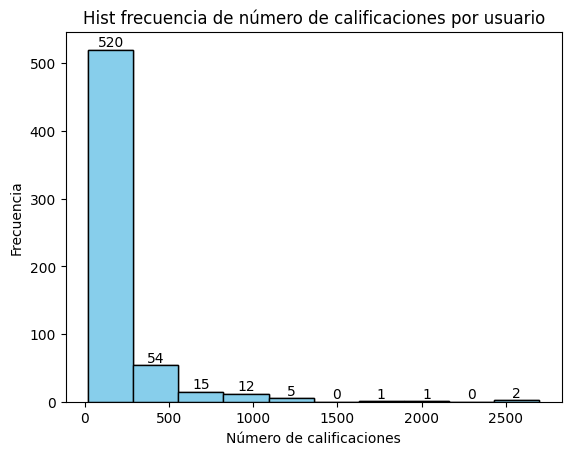

In [14]:

# Crear el histograma
plt.hist(rating_users['cnt_rat'], bins=10, color='skyblue', edgecolor='black')

# Añadir título y etiquetas
plt.title('Hist frecuencia de número de calificaciones por usuario')
plt.xlabel('Número de calificaciones')
plt.ylabel('Frecuencia')

# Obtener los valores del histograma (cuentas y bordes de los bins)
counts, bins, patches = plt.hist(rating_users['cnt_rat'], bins=10, color='skyblue', edgecolor='black')

# Añadir los números de conteo en cada barra
for count, patch in zip(counts, patches):
    height = patch.get_height()
    plt.text(patch.get_x() + patch.get_width() / 2, height, f'{int(count)}', ha='center', va='bottom')

# Mostrar el gráfico
plt.show()


In [15]:
#### excluir usuarios con menos de 50 películas calificadas (para tener calificaion confiable) y los que tienen mas de mil porque pueden ser no razonables

rating_users2=pd.read_sql(''' select "userId" as user_id,
                         count(*) as cnt_rat
                         from ratings
                         group by "userId"
                         having cnt_rat >=50 and cnt_rat <=1000
                         order by cnt_rat asc
                         ''',conn )

### ver distribucion despues de filtros,ahora se ve mas razonables
rating_users2.describe()




,user_id,cnt_rat
count,373.000000,373.000000
mean,301.766756,201.863271
std,178.462796,187.219913
min,1.000000,50.000000
25%,141.000000,77.000000
50%,305.000000,129.000000
75%,455.000000,248.000000
max,608.000000,977.000000


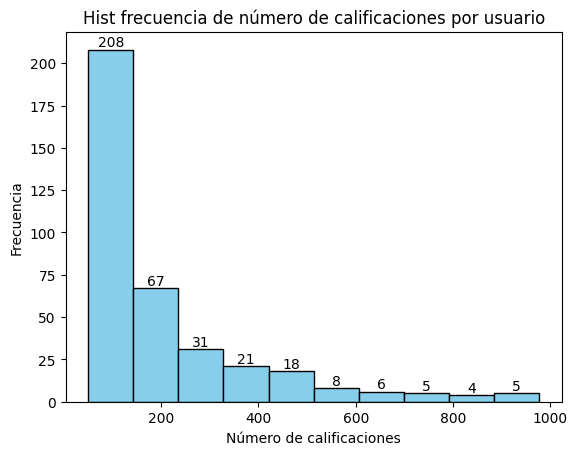

In [16]:
# Crear el histograma para los datos filtrados
counts, bins, patches = plt.hist(rating_users2['cnt_rat'], bins=10, color='skyblue', edgecolor='black')

# Añadir título y etiquetas
plt.title('Hist frecuencia de número de calificaciones por usuario')
plt.xlabel('Número de calificaciones')
plt.ylabel('Frecuencia')

# Añadir los números de conteo en cada barra
for count, patch in zip(counts, patches):
    height = patch.get_height()
    plt.text(patch.get_x() + patch.get_width() / 2, height, f'{int(count)}', ha='center', va='bottom')

# Mostrar el gráfico
plt.show()


In [17]:
#### verificar cuantas calificaciones tiene cada película
rating_movies=pd.read_sql(''' select movieId ,
                         count(*) as cnt_rat
                         from ratings
                         group by "movieId"
                         order by cnt_rat desc
                         ''',conn )

### analizar distribucion de calificaciones por película
rating_movies.describe()


,movieId,cnt_rat
count,9724.000000,9724.000000
mean,42245.024373,10.369807
std,52191.137320,22.401005
min,1.000000,1.000000
25%,3245.500000,1.000000
50%,7300.000000,3.000000
75%,76739.250000,9.000000
max,193609.000000,329.000000


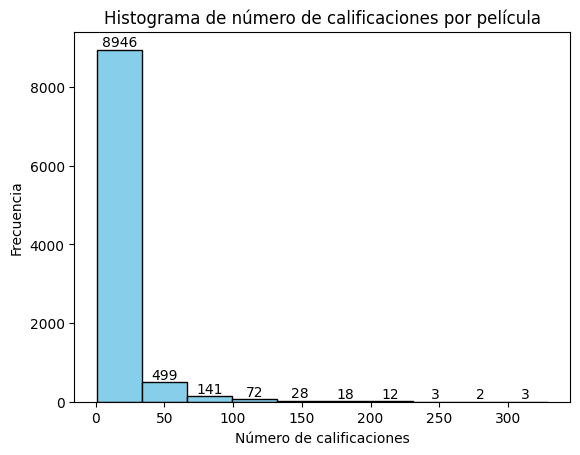

In [18]:
# Crear el histograma
counts, bins, patches = plt.hist(rating_movies['cnt_rat'], bins=10, color='skyblue', edgecolor='black')

# Añadir título y etiquetas
plt.title('Histograma de número de calificaciones por película')
plt.xlabel('Número de calificaciones')
plt.ylabel('Frecuencia')

# Añadir los números de conteo en cada barra
for count, patch in zip(counts, patches):
    height = patch.get_height()
    plt.text(patch.get_x() + patch.get_width() / 2, height, f'{int(count)}', ha='center', va='bottom')

# Mostrar el gráfico
plt.show()


             movieId      cnt_rat
count    2269.000000  2269.000000
mean    20530.586161    35.749669
std     35185.840333    35.986989
min         1.000000    10.000000
25%      1345.000000    14.000000
50%      3256.000000    22.000000
75%      8958.000000    43.000000
max    187593.000000   329.000000


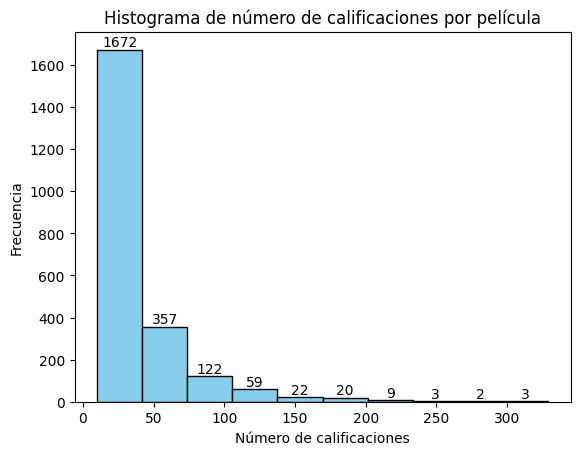

In [19]:
import matplotlib.pyplot as plt

# Consulta para excluir películas con menos de 10 calificaciones
rating_movies2 = pd.read_sql('''
    SELECT MovieId, COUNT(*) AS cnt_rat
    FROM ratings
    GROUP BY "MovieId"
    HAVING COUNT(*) >= 10
    ORDER BY cnt_rat DESC
''', conn)

# Mostrar las estadísticas descriptivas
print(rating_movies2.describe())

# Crear el histograma
counts, bins, patches = plt.hist(rating_movies2['cnt_rat'], bins=10, color='skyblue', edgecolor='black')

# Añadir título y etiquetas
plt.title('Histograma de número de calificaciones por película')
plt.xlabel('Número de calificaciones')
plt.ylabel('Frecuencia')

# Añadir los números de conteo en cada barra
for count, patch in zip(counts, patches):
    height = patch.get_height()
    plt.text(patch.get_x() + patch.get_width() / 2, height, f'{int(count)}', ha='center', va='bottom')

# Mostrar el gráfico
plt.show()


In [20]:
# Ejecutar el archivo SQL (preprocesamiento.sql)
with open('preprocesamiento.ipynb', 'r') as file:
    preprocesamiento = nbformat.read(file, as_version=4)

# Verificar y cargar los datos en'ratings_final'
ratings_count = pd.read_sql('SELECT COUNT(*) FROM ratings_final', conn)
ratings = pd.read_sql('SELECT * FROM ratings_final', conn)


# Verificar y cargar los datos en 'movies_final'
movies_count = pd.read_sql('SELECT COUNT(*) FROM movies_final', conn)
movies = pd.read_sql('SELECT * FROM movies_final', conn)


# Verificar y cargar los datos en'pelis_final'
ratings_final_count = pd.read_sql('SELECT COUNT(*) FROM pelis_final', conn)
df_final = pd.read_sql('SELECT * FROM pelis_final', conn)



In [26]:
print(movies.columns)

Index(['movieId', 'title', 'movieid:1', 'cnt_rat', 'Action', 'Adventure',
       'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')


In [35]:
# Separar géneros en base de datos
genres = movies['genres'].str.split('|')
te = TransactionEncoder()
genres_encoded = te.fit_transform(genres)
genres_df = pd.DataFrame(genres_encoded, columns=te.columns_)
genres_df = genres_df.astype(int)
movies = movies.drop(['genres'], axis=1)
movies = pd.concat([movies, genres_df], axis=1)
# Eliminar la variable 'movieId:1' que no es necesaria
movies = movies.drop(['movieid:1'], axis=1)

KeyError: 'genres'